<a href="https://colab.research.google.com/github/ashmangla/ashmangla.gitbhub.io/blob/main/SLF_ReCELL_Used%20Devices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Learning - Foundations Project: ReCell

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.


### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.


### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [26]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
# !pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 -q --user

In [27]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
# !pip install scikit-learn==1.2.2 seaborn==0.11.1 matplotlib==3.3.4 numpy==1.24.3 pandas==1.5.2 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [28]:
import pandas as pd
import numpy as np

#Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Modeling libraries
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif



## Loading the dataset

In [29]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
path = "/content/drive/MyDrive/Colab Notebooks/used_device_data.csv"
df = pd.read_csv(path)
data = df.copy()

## Data Overview

- Observations
- Sanity checks

In [31]:
#Check the first few rows
data.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


In [32]:
#check the number of rows and columns
data.shape

(3454, 15)

In [33]:
#Understand the column types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

In [34]:
#Get the stat summary for all the columns
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3454,34,Others,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3454,4,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3454.0,NaN,NaN,NaN,13.713115,3.80528,5.08,12.7,12.83,15.34,30.71
4g,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3275.0,NaN,NaN,NaN,9.460208,4.815461,0.08,5.0,8.0,13.0,48.0
selfie_camera_mp,3452.0,NaN,NaN,NaN,6.554229,6.970372,0.0,2.0,5.0,8.0,32.0
int_memory,3450.0,NaN,NaN,NaN,54.573099,84.972371,0.01,16.0,32.0,64.0,1024.0
ram,3450.0,NaN,NaN,NaN,4.036122,1.365105,0.02,4.0,4.0,4.0,12.0
battery,3448.0,NaN,NaN,NaN,3133.402697,1299.682844,500.0,2100.0,3000.0,4000.0,9720.0


In [35]:
#Check for duplicates
data.duplicated().sum()

np.int64(0)

There are no duplicates

In [36]:
#check for null values
data.isnull().sum()

,0
brand_name,0
os,0
screen_size,0
4g,0
5g,0
main_camera_mp,179
selfie_camera_mp,2
int_memory,4
ram,4
battery,6


In [37]:
print(data.os.value_counts(), data.os.value_counts(normalize=True))

os
Android    3214
Others      137
Windows      67
iOS          36
Name: count, dtype: int64 os
Android    0.930515
Others     0.039664
Windows    0.019398
iOS        0.010423
Name: proportion, dtype: float64


Obervations:
There are 3454 rows and 15 columns. There are no duplicates.

From the 15 columns 4 are categorical and the rest 11 are numerical

There are 33 unique brands and one bucket category of others that captures 502 phones with no known brand.

There are 4 uniques OS (Android, Others, Windows, IOS) with Android accounting for 93% of these.

From the 15 columns the following have missing values and may need to be treated, especially the main_camera_mp:
1. main_camera_mp (179)
2. selfie_camera_mp (2)
3. int_memory (4)
4. ram (4)
5. battery (6)
6. weight (7)

The release_year will need to be normalised from current year, otherwise the numbers will be misconstrued.
# New Section


## Exploratory Data Analysis (EDA)

# Univariate analyses

In [38]:
#Function for boxplot and histogram
def univ_distribution(data, parameter):
  fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5)) # 1 row, 2 columns, adjust figsize as needed
  sns.boxplot(data = data, x=parameter,showmeans=True, ax=axes[0]) # Use the first axis for the boxplot
  axes[0].set_title('Box Plot') # Set title for the box plot

  sns.histplot(data=data, x=parameter, kde=True,ax=axes[1]) # Use the second axis for the histplot
  axes[1].set_title('Histogram') # Set title for the histogram

  return

In [39]:
#Function for value counts
def print_value_counts(data, parameter):
  counts=data[parameter].value_counts()
  p_counts=data[parameter].value_counts(normalize=True)*100
  temp_df=pd.DataFrame({'Count': counts, 'Percentage': p_counts})
  print(temp_df)
  return

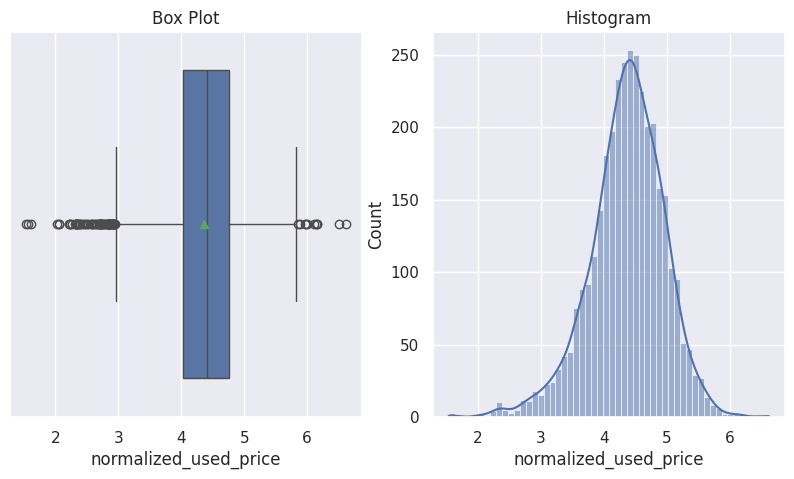

In [40]:
#Normalised Used Price
univ_distribution(data,"normalized_used_price")


There are quite a few outliers on the smaller side - as can be seen in the distribtion also which is slightly skew-ed with a left tail and the mean is smaller than the median. But the distribution can be considered fairly normal.

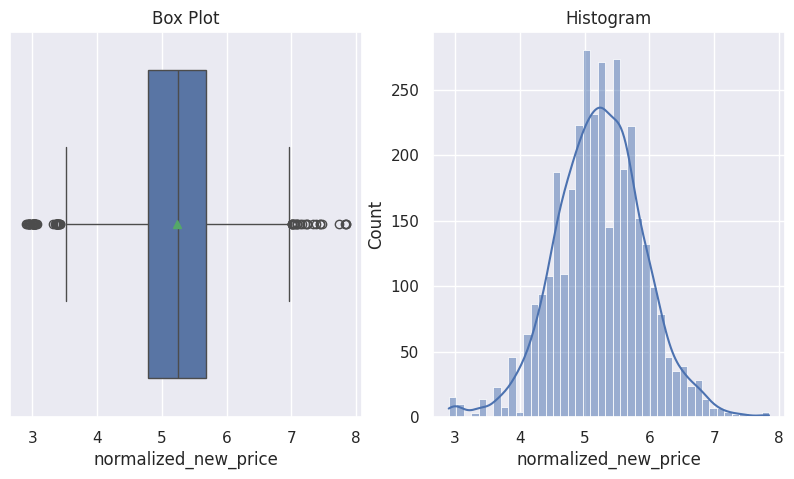

In [41]:
#Normalized new Price
univ_distribution(data,"normalized_new_price")

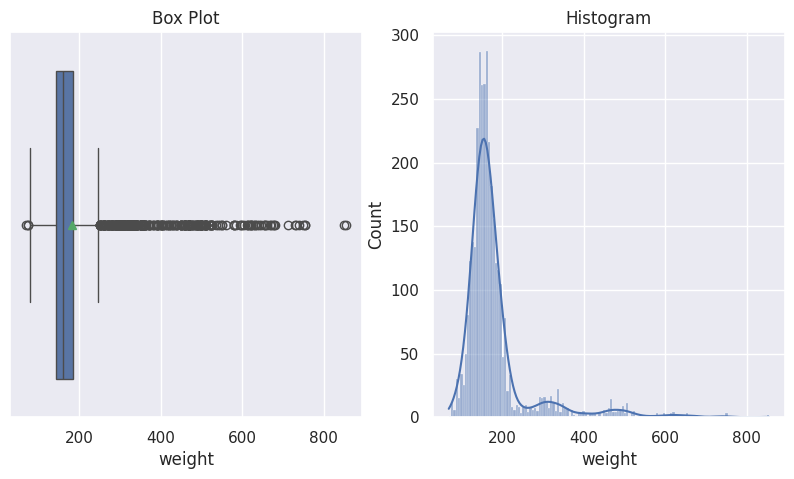

In [42]:
#Weight
univ_distribution(data,"weight")


Weight is very much right-skewed with mean larger than the median and a long right tail - many outliers on the higher end.

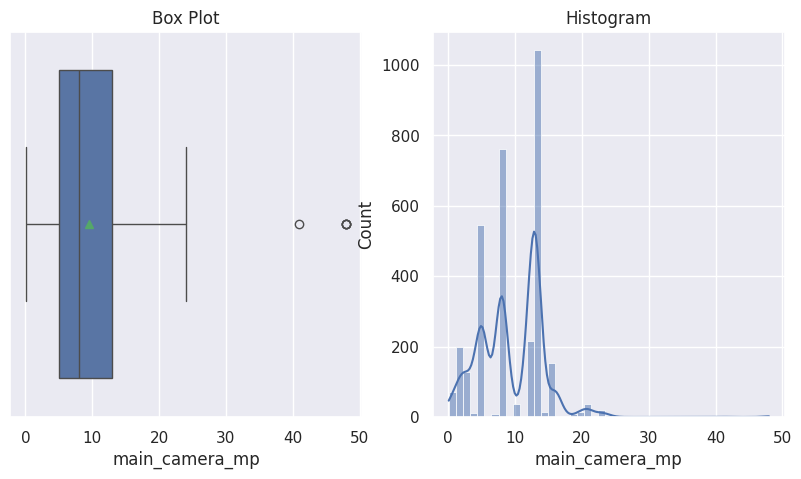

In [43]:
#Main camera
univ_distribution(data,"main_camera_mp") # Set title for the histogram

In [44]:
print_value_counts(data, 'main_camera_mp')

                Count  Percentage
main_camera_mp                   
13.00            1035   31.603053
8.00              755   23.053435
5.00              546   16.671756
12.00             189    5.770992
2.00              171    5.221374
16.00             154    4.702290
3.15              122    3.725191
0.30               69    2.106870
10.50              30    0.916031
1.30               26    0.793893
21.00              19    0.580153
23.00              19    0.580153
20.70              16    0.488550
14.50              13    0.396947
20.00              13    0.396947
12.20              12    0.366412
4.00               10    0.305344
12.30               9    0.274809
19.00               8    0.244275
8.10                7    0.213740
13.10               6    0.183206
10.00               6    0.183206
24.00               5    0.152672
3.00                5    0.152672
48.00               4    0.122137
6.70                4    0.122137
6.50                4    0.122137
12.50         

This seems to be a multi modal distribution,(likely based on the years) with a right skew. and couple of outliers. 31.6% (1035 count of devices) the majority have a value of 13. and 23% have a value of 8

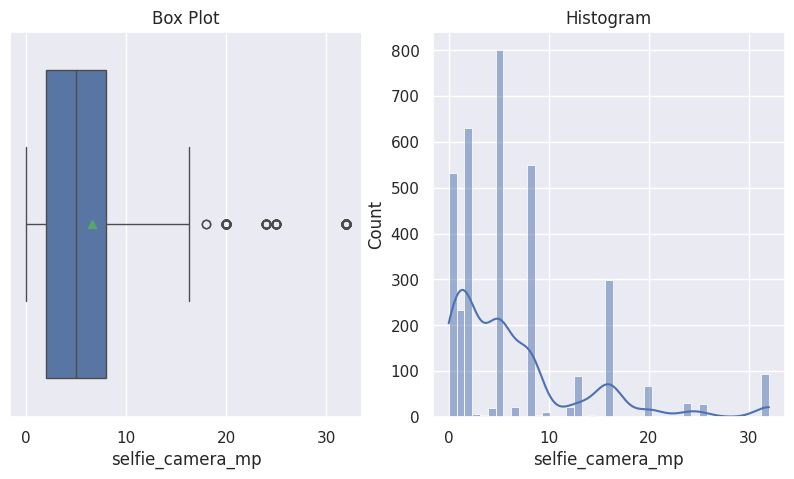

In [45]:
#selfie camera
univ_distribution(data,"selfie_camera_mp")

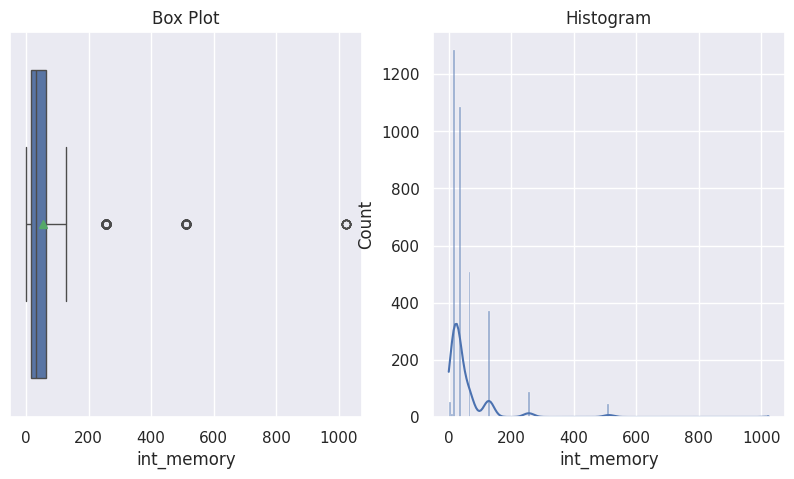

In [46]:
#Memory
univ_distribution(data,"int_memory")

In [47]:
print_value_counts(data, 'int_memory')

            Count  Percentage
int_memory                   
16.00        1283   37.188406
32.00        1083   31.391304
64.00         509   14.753623
128.00        372   10.782609
256.00         86    2.492754
512.00         44    1.275362
0.06           18    0.521739
0.10           17    0.492754
8.00           12    0.347826
4.00           10    0.289855
1024.00         8    0.231884
0.50            4    0.115942
0.20            2    0.057971
24.00           1    0.028986
0.01            1    0.028986


internal memory has a wide variance with the mode (most popular) at 16 ( 37% ) and the next popular 31.5% - 32; and 14.8% : 64.

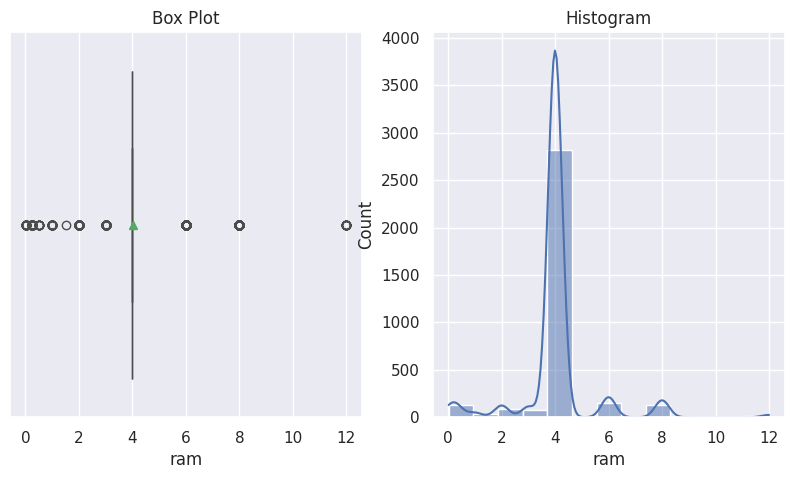

In [48]:
#RAM
univ_distribution(data,"ram")

In [49]:
print_value_counts(data, 'ram')

       Count  Percentage
ram                     
4.00    2815   81.594203
6.00     154    4.463768
8.00     130    3.768116
2.00      90    2.608696
0.25      83    2.405797
3.00      81    2.347826
1.00      34    0.985507
12.00     18    0.521739
0.02      18    0.521739
0.03      17    0.492754
0.50       9    0.260870
1.50       1    0.028986


most popular ram size is 4 (~82%)

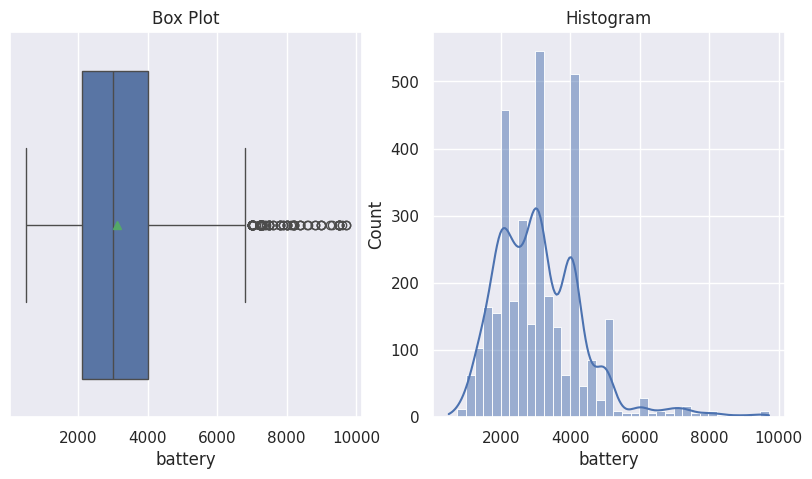

In [50]:
#Battery
univ_distribution(data,"battery")


This seems to be a multi modal distribution,(likely based on the years) with a right skew. with outliers on the right. Mean is larger than the median

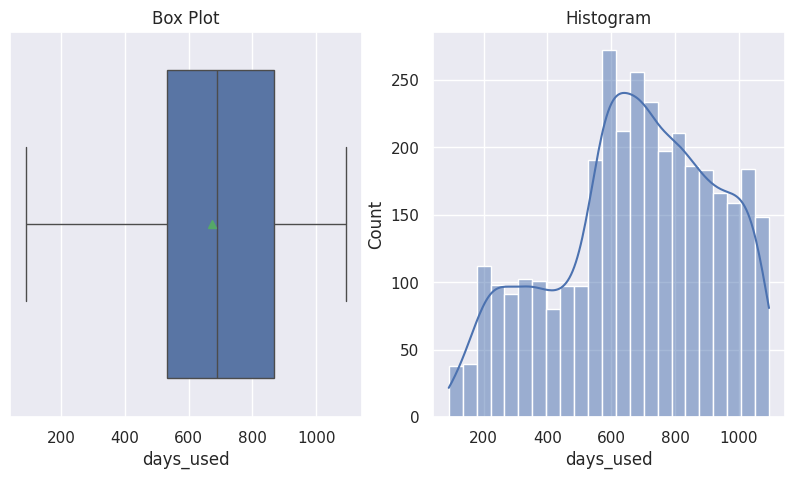

In [51]:
#Days_used
univ_distribution(data,"days_used")

More phones are used for over ~650 days than under .

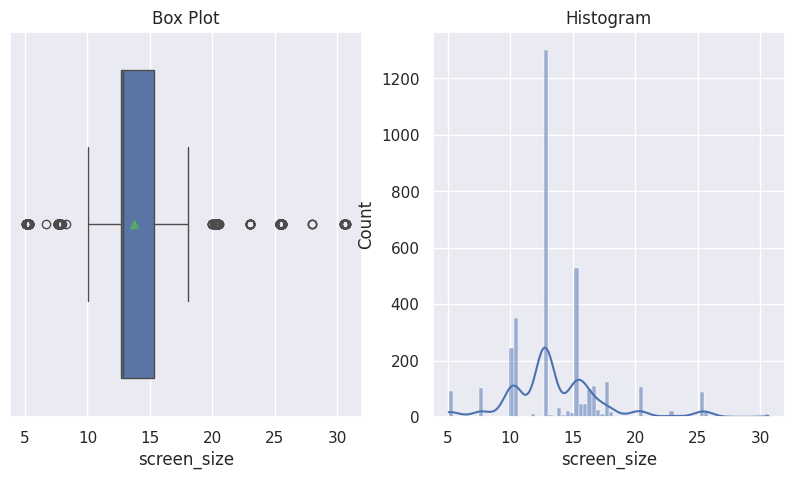

In [52]:
#Screen_size
univ_distribution(data,"screen_size")

In [53]:
print_value_counts(data, 'screen_size')

             Count  Percentage
screen_size                   
12.70          575   16.647365
12.83          409   11.841343
10.29          219    6.340475
10.16          188    5.442965
15.24          129    3.734800
...            ...         ...
13.56            1    0.028952
12.67            1    0.028952
10.19            1    0.028952
17.81            1    0.028952
14.81            1    0.028952

[142 rows x 2 columns]


**Univariate analysis of categorical data **

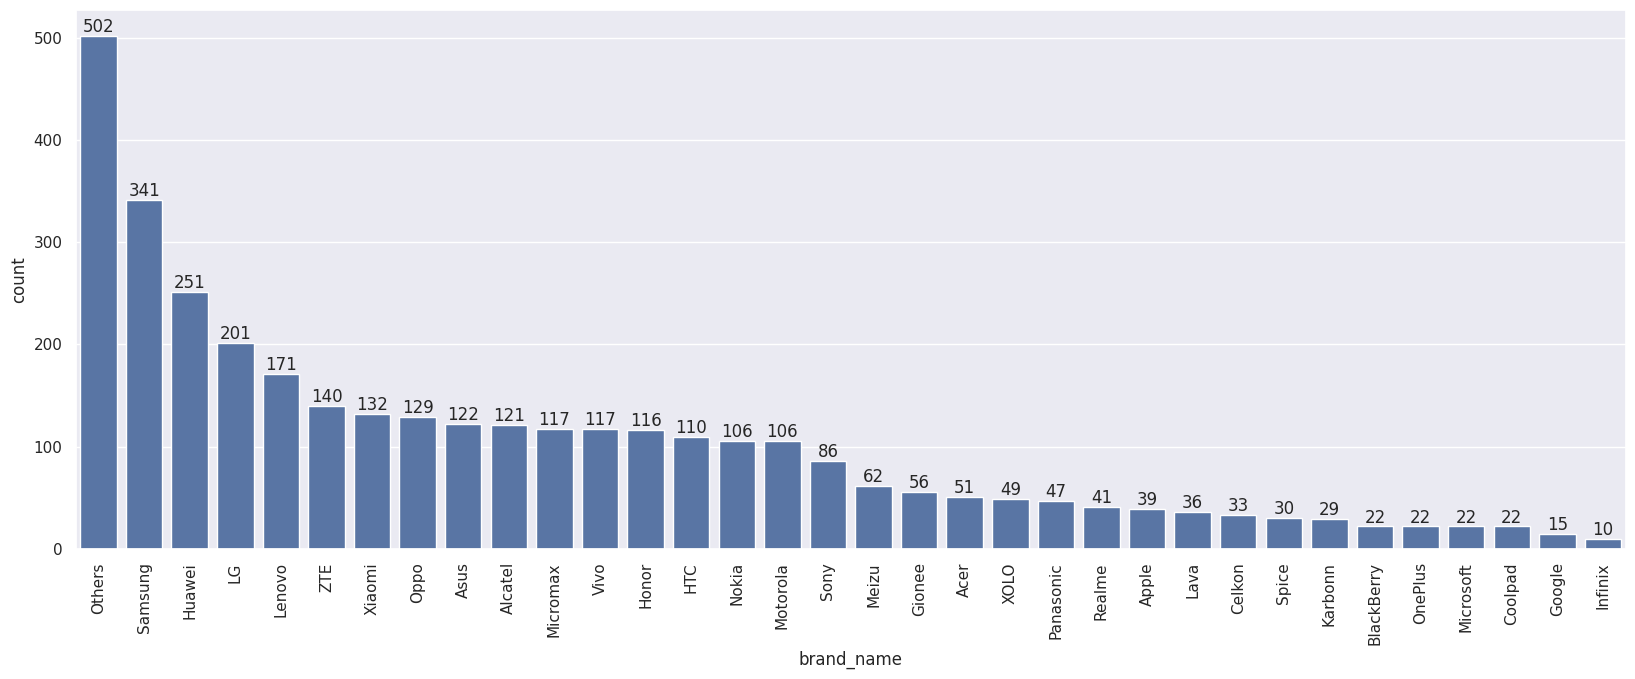

In [54]:
#BrandName
plt.figure(figsize=(20,7))
ax = sns.countplot(x = 'brand_name',
              data = data,
              order = data['brand_name'].value_counts().index)
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.show()

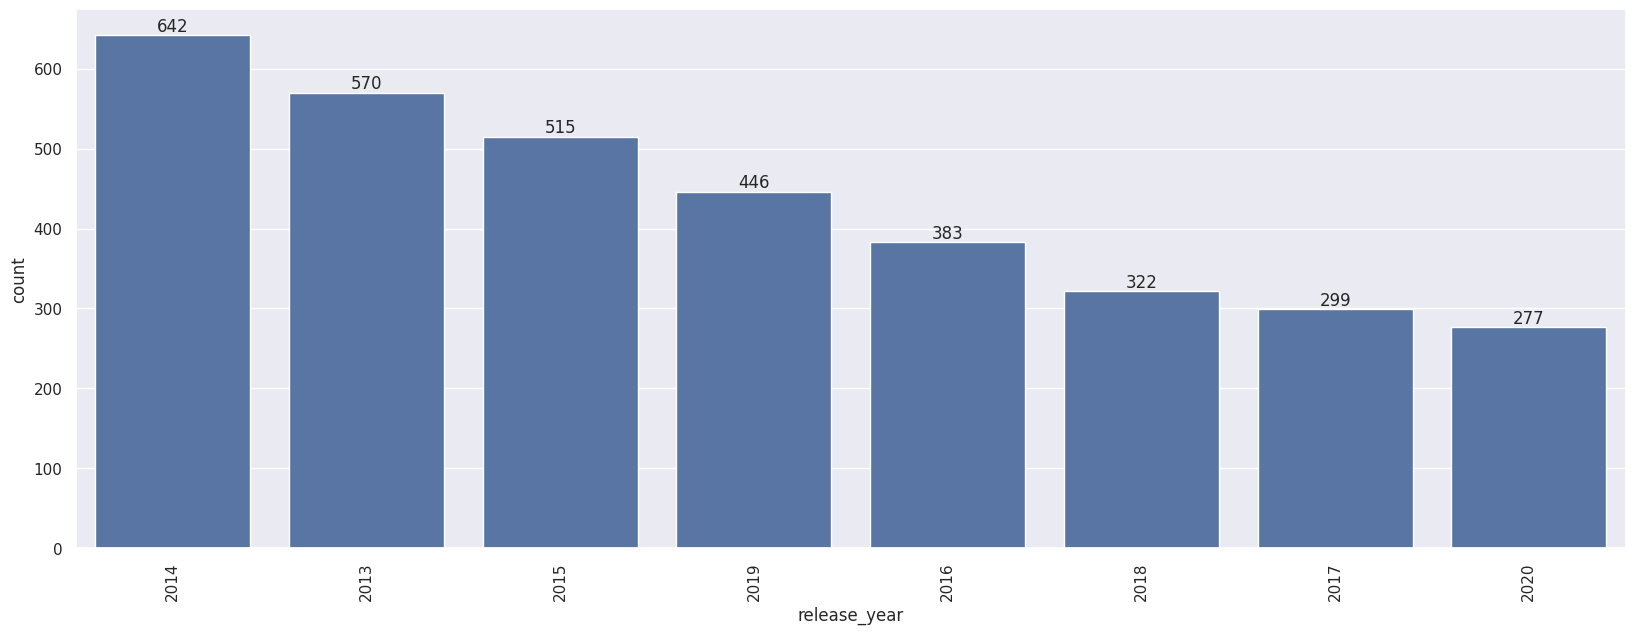

In [55]:
#Release Year
plt.figure(figsize=(20,7))
ax = sns.countplot(x = 'release_year',
              data = data,
              order = data['release_year'].value_counts().index)
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.show()

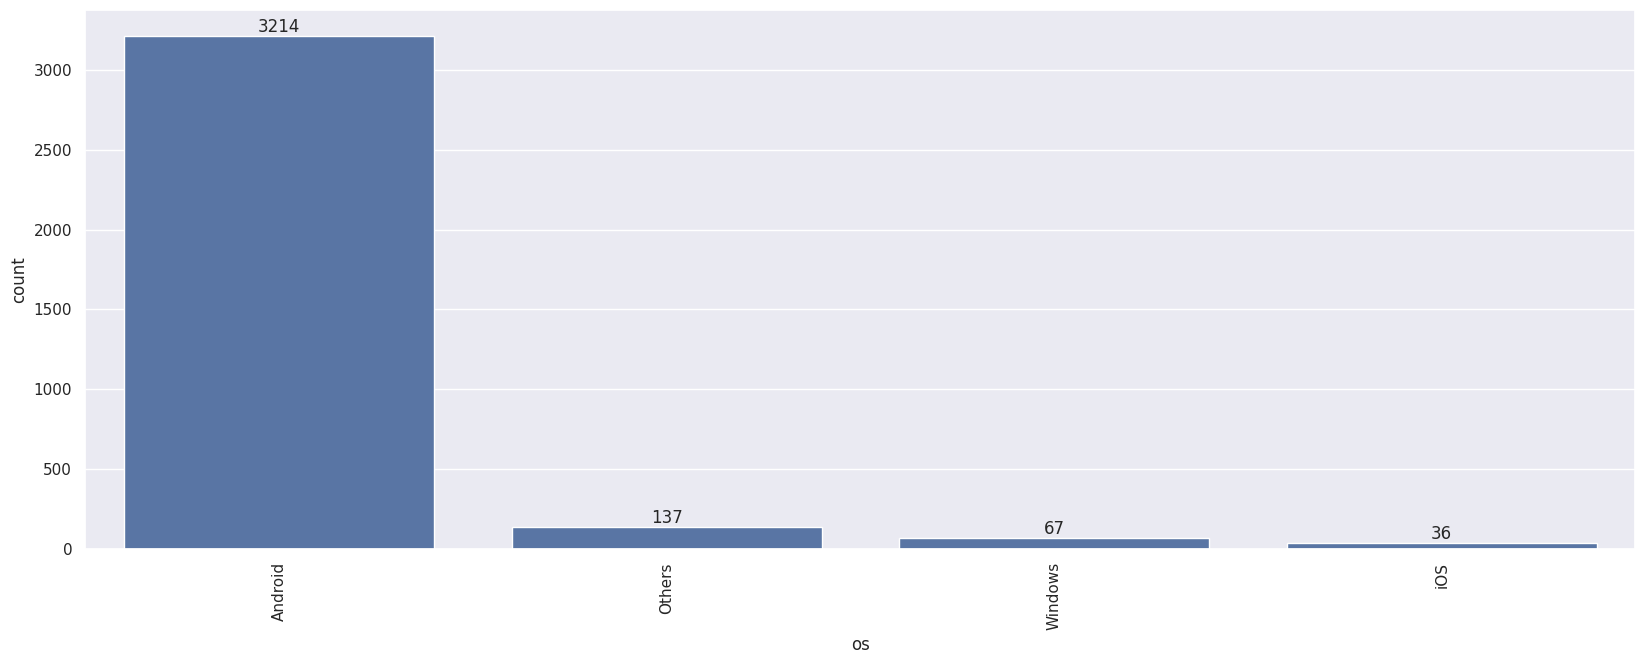

In [56]:
#OS
plt.figure(figsize=(20,7))
ax = sns.countplot(x = 'os',
              data = data,
              order = data['os'].value_counts().index)
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.show()

From the categorical variables its clear that
1. Android dominates the market as observed previously.
2.Older phones are higher in number - indicating that folks may hold on to their phones longer or that the used price market is not as lucrative and they dont sell ageing further.
3. Samsung and Huwawei are the prominent brands
4. I dont think it makes sense to do univariate analysis of 4g and 5g for counts as most 5G would be backward compatible with 4G. it might be better to do it with price since 5G is better functionality so ideally should be higher priced.

# Bivariate Analysis

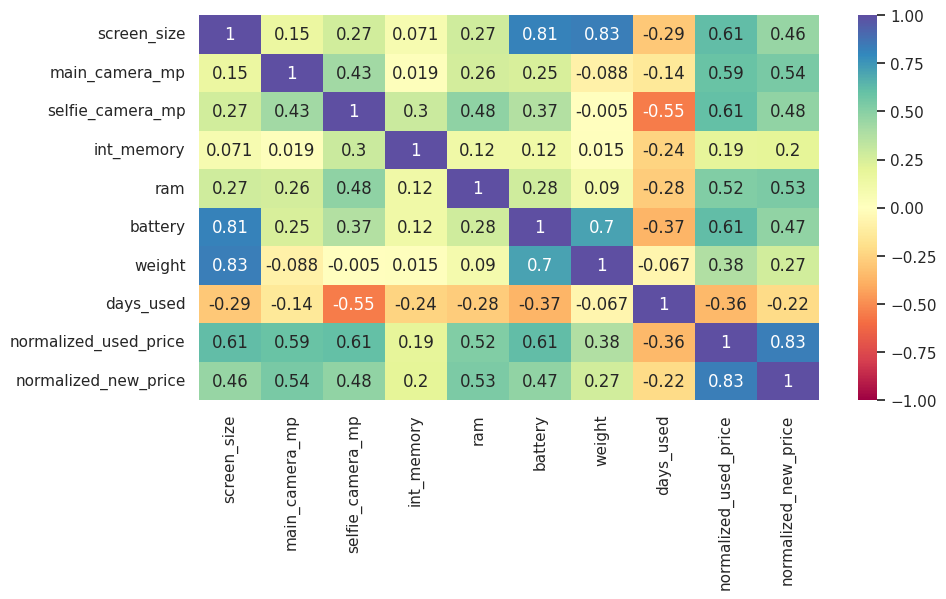

In [57]:
#heatmap of numerical variables
columnlist = df.select_dtypes(include=np.number).columns.tolist()
columnslist = columnlist.remove("release_year")
plt.figure(figsize=(10,5))
sns.heatmap(data[columnlist].corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

We can see a strong correlation between the following:
1. battery and screen size
2. battery and weight
3. screen size and weight
4. normalized_used_price and normalized_new_price

Moderate correlation between functionalities and price like:
1. Normalised used price/Normalized new price and screen_size, main_camera_mp, selfie_camera_mp, ram, battery

As expected there is a negative correlation between
1. Days used and price
2. Days used and key features like camera, battery, weight, memory and screen size.
3. Cameras and weight

In [58]:
#commenting the code below since it does not reveal any additioanl insights
#columnlist = data.select_dtypes(include=np.number).columns.tolist()
#numeric_data= data[columnlist].copy()
#sns.pairplot(
#    numeric_data, diag_kind="kde"
#)

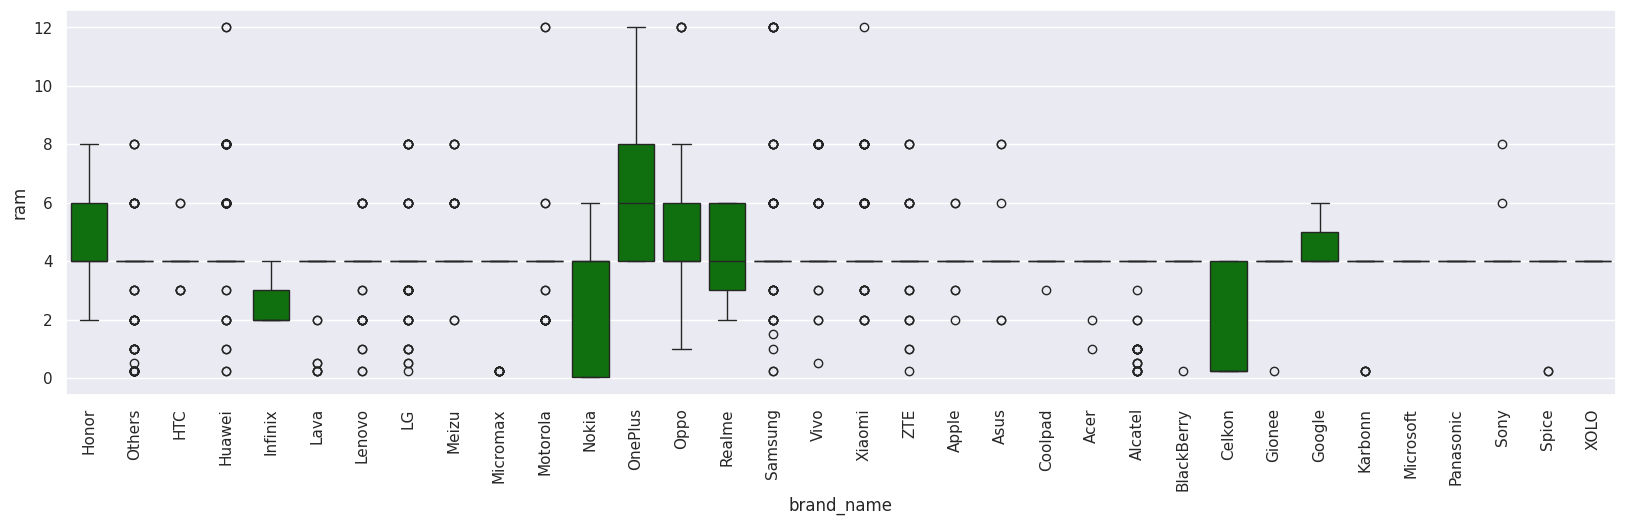

In [59]:
#Brand Name and RAM
plt.figure(figsize=(20, 5))
sns.boxplot(data=data, x="brand_name", y="ram", color='green')
plt.xticks(rotation=90)
plt.show()

In [60]:
df.groupby('brand_name')['ram'].value_counts(dropna=False).unstack(fill_value='')

ram,0.02,0.03,0.25,0.50,1.00,1.50,2.00,3.00,4.00,6.00,8.00,12.00,NaN
brand_name,,,,,,,,,,,,,
Acer,,,,,1,,1,,49,,,,
Alcatel,,,7,3,10,,2,1,98,,,,
Apple,,,,,,,1,2,34,2,,,
Asus,,,,,,,2,,117,1,2,,
BlackBerry,,,1,,,,,,21,,,,
Celkon,,,21,,,,,,12,,,,
Coolpad,,,,,,,,1,21,,,,
Gionee,,,1,,,,,,55,,,,
Google,,,,,,,,,11,4,,,


Most brand names have ram at 4 - which accounts for most of the devices.
Infinix,  Celkon have devices between 0-4 RAM mostly
OnePlus, Motorola, Huwawei and Oppo and Nokia have devices with the highest rams

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

(341, 15)
brand_name
Samsung      50
Others       41
Huawei       37
Xiaomi       31
Lenovo       28
Asus         22
Apple        17
Honor        14
Motorola     14
Vivo         13
LG           12
Realme       12
ZTE          10
Gionee       10
Acer          7
Infinix       6
Sony          6
Oppo          4
Alcatel       1
Google        1
HTC           1
Nokia         1
Micromax      1
Panasonic     1
Spice         1
Name: count, dtype: int64


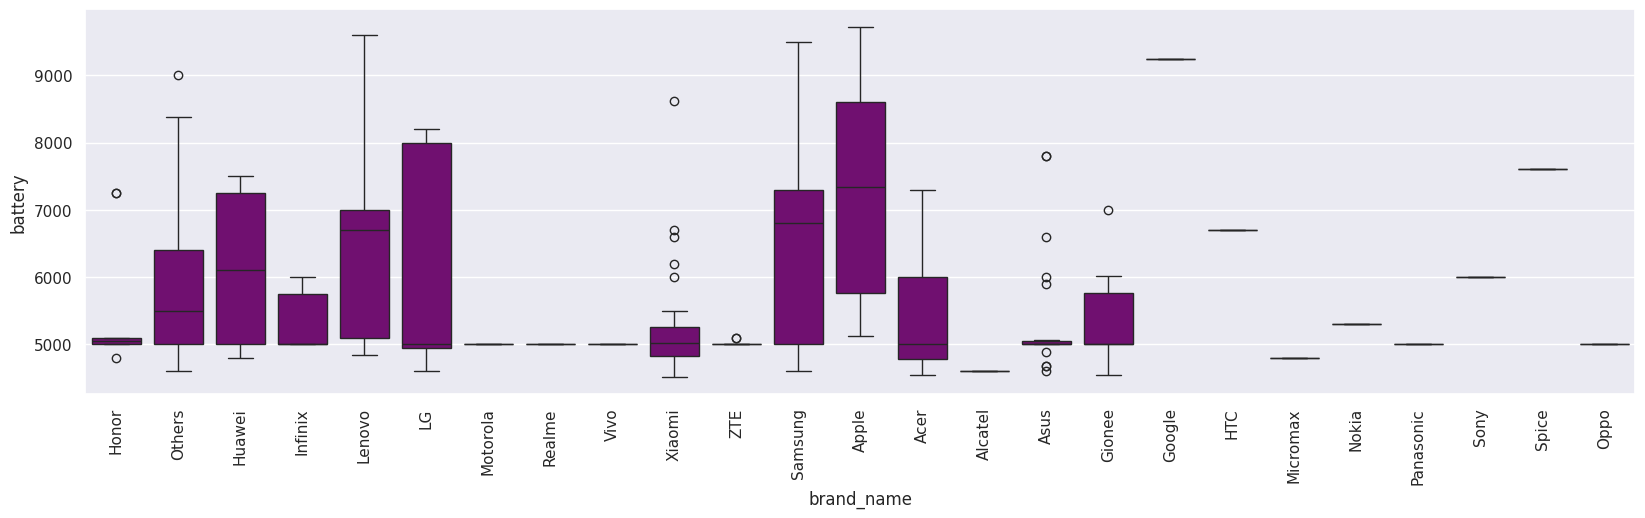

In [61]:
#A large battery often increases a device's weight, making it feel uncomfortable in the hands.
#How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
large_battery_df = data[data['battery']>4500]
print(large_battery_df.shape)
print(large_battery_df['brand_name'].value_counts())
plt.figure(figsize=(20, 5))
sns.boxplot(data=large_battery_df, x="brand_name", y="battery", color='purple')
plt.xticks(rotation=90)
plt.show()

There are 341 devices with large battery qith Samsung having the largest number of devices (50). Apple shows one of the highest battery levels, Samsung and Lenovo are next comparing the medians. Lenovo has the largest range. Huwawei is next ; LG is good to but seems right skewed - the median is on the lower end of the range.

(1099, 15)
brand_name
Huawei       149
Samsung      119
Others        99
Vivo          80
Honor         72
Oppo          70
Lenovo        69
Xiaomi        69
LG            59
Motorola      42
Asus          41
Realme        40
Alcatel       26
Apple         24
Acer          19
Meizu         17
ZTE           17
OnePlus       16
Nokia         15
Sony          12
Infinix       10
HTC            7
Micromax       7
Google         4
Coolpad        3
Gionee         3
XOLO           3
Panasonic      2
Karbonn        2
Spice          2
Microsoft      1
Name: count, dtype: int64


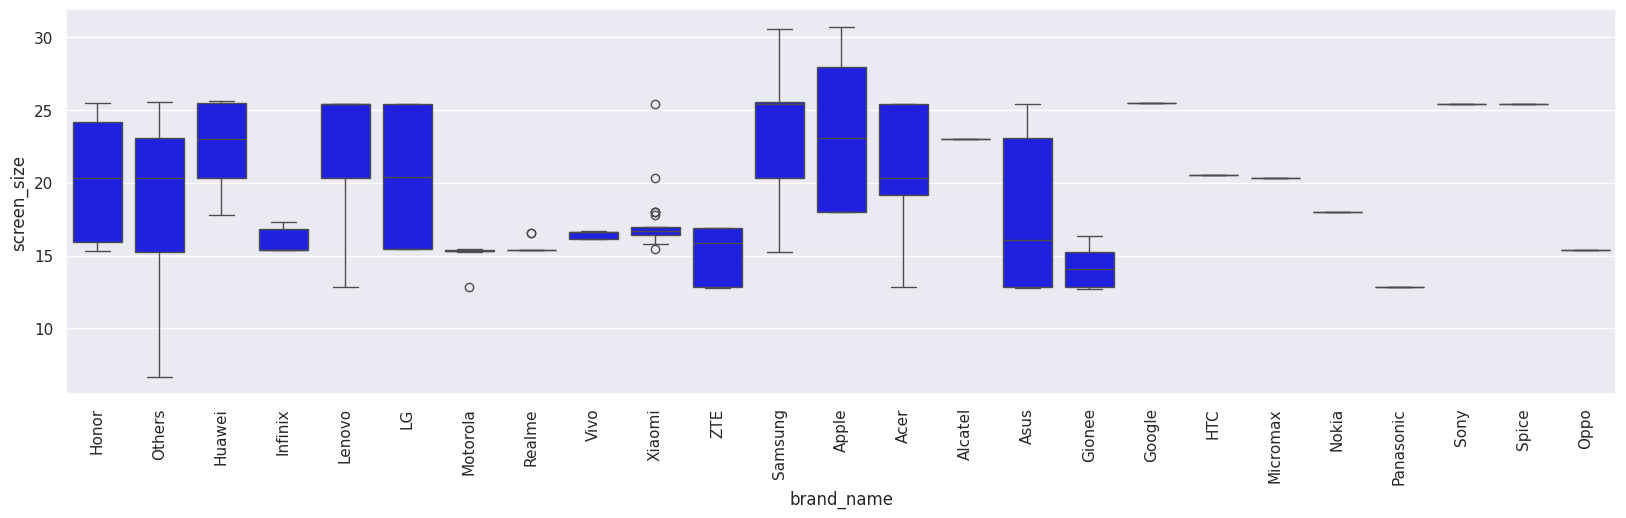

In [62]:
 #Bigger screens are desirable for entertainment purposes as they offer a better viewing experience.
 # How many phones and tablets are available across different brands with a screen size larger than 6 inches?
largerscreen_df = data[data['screen_size']>(6*2.54)]
print(largerscreen_df.shape)
print(largerscreen_df['brand_name'].value_counts())
plt.figure(figsize=(20, 5))
sns.boxplot(data=large_battery_df, x="brand_name", y="screen_size", color='blue')
plt.xticks(rotation=90)
plt.show()



1099 devices have large screen size. Huawei and Samsung have the largest numbers (> 100). 25 out of the 33 brands offer large sizes. Huwawei and Apple have the highest medians for screen size. While Apple and Samsung offer the biggest screen sizes. LG, HOnor, Acer and Others all have about the same median value of ~8.6 inches. Honor, Others, Huawei, Lenovo, LG, Asus , Acer all have a max of ~10.2 inches.

(655, 15)
brand_name
Huawei        87
Vivo          78
Oppo          75
Xiaomi        63
Samsung       57
Honor         41
Others        34
LG            32
Motorola      26
Meizu         24
ZTE           20
HTC           20
Realme        18
OnePlus       18
Sony          14
Lenovo        14
Nokia         10
Asus           6
Infinix        4
Gionee         4
Coolpad        3
Micromax       2
BlackBerry     2
Panasonic      2
Acer           1
Name: count, dtype: int64


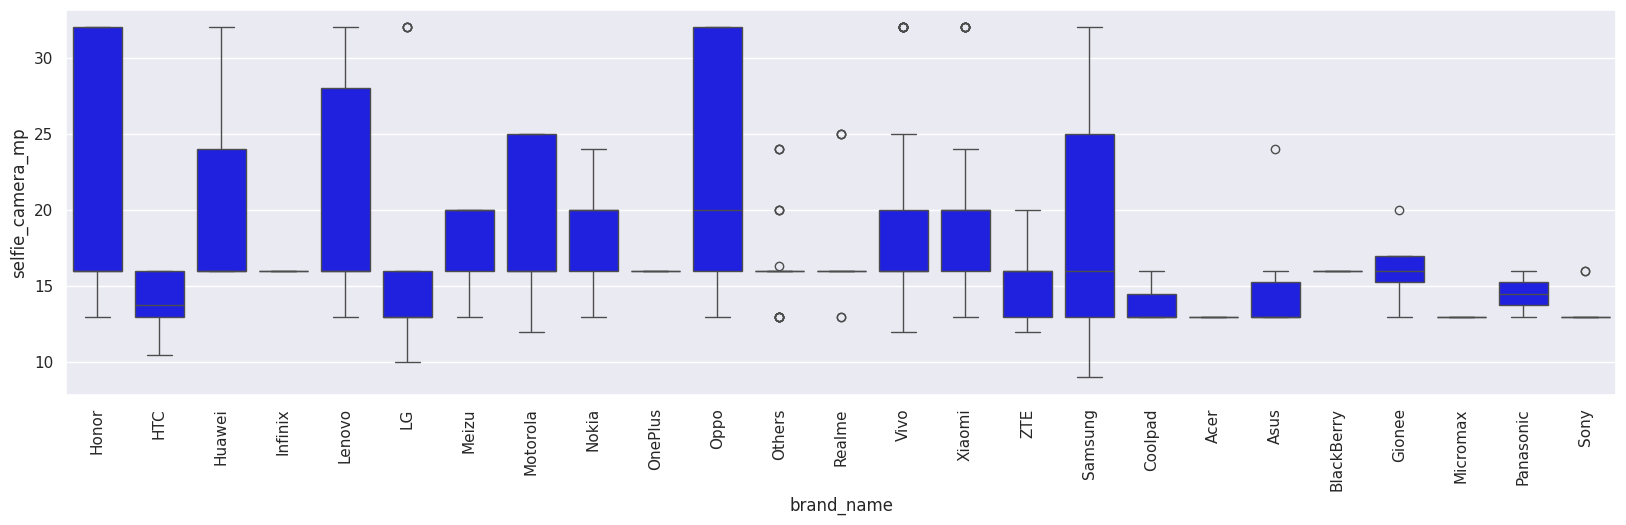

In [63]:
#A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones.
#What is the distribution of devices offering greater than 8MP selfie cameras across brands

selfiecamera_df = data[data['selfie_camera_mp']>8]
print(selfiecamera_df.shape)
print(selfiecamera_df['brand_name'].value_counts())
plt.figure(figsize=(20, 5))
sns.boxplot(data=selfiecamera_df, x="brand_name", y="selfie_camera_mp", color='blue')
plt.xticks(rotation=90)
plt.show()


655 devices have > 8 mp cameras across 25 brands (interestingly does not include Apple). Honor, Oppo have similar distributions . Honor , Lenovo, Huawei , oppo and Samsung all have the max mp at ~33. Samsung has the largest range.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

Answers to the questions based on the EDA:
1. The distribution of normalized used device prices is almost normal with a slight left skew and outliers on the left. The mean is slighty smaller than the median because of this.
2. 93.05% of the devices are Android

Ques 3, 4, 5, 6 have been answered inline

7. Strong correlation between functionalities and price like:
 Normalised used price is strongly correlated with  screen_size, main_camera_mp, selfie_camera_mp, ram, batteryas well as normalized_new_price

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [64]:
#Missing Value treatment
#Impute the columns main_camera_mp, selfie_camera_mp, int_memory, ram, battery, weight  using median value for brand name and year for that column
df_imputed = data.copy()
cols_to_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "int_memory",
    "ram",
    "battery",
    "weight",
]

for col in cols_to_impute:
    df_imputed[col] = df_imputed[col].fillna(
        value=df_imputed.groupby(['release_year','brand_name'])[col].transform("median")
    )

# checking for missing values
df_imputed.isnull().sum()


,0
brand_name,0
os,0
screen_size,0
4g,0
5g,0
main_camera_mp,179
selfie_camera_mp,2
int_memory,0
ram,0
battery,6


In [65]:

cols_to_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "battery",
    "weight",
]

for col in cols_to_impute:
    df_imputed[col] = df_imputed[col].fillna(
        value=df_imputed.groupby(['brand_name'])[col].transform("median")
    )

# checking for missing values
df_imputed.isnull().sum()

,0
brand_name,0
os,0
screen_size,0
4g,0
5g,0
main_camera_mp,10
selfie_camera_mp,0
int_memory,0
ram,0
battery,0


In [66]:
df_imputed['main_camera_mp'] = df_imputed['main_camera_mp'].fillna(df_imputed['main_camera_mp'].median())

# checking for missing values
df_imputed.isnull().sum()

,0
brand_name,0
os,0
screen_size,0
4g,0
5g,0
main_camera_mp,0
selfie_camera_mp,0
int_memory,0
ram,0
battery,0


In [67]:
# Add a feature for age_in_years using release_year and current year
from datetime import date
current_year = date.today().year
df_imputed['age_in_years'] = current_year - df_imputed['release_year']
df_imputed.drop("release_year", axis=1, inplace=True)


In [68]:
df_imputed['age_in_years'].describe()

,age_in_years
count,3454.000000
mean,9.034742
std,2.298455
min,5.000000
25%,7.000000
50%,9.500000
75%,11.000000
max,12.000000


In [69]:
# convert the categorical into numerical : 4G, 5G, os, brand_name
cols_to_encode = df_imputed.select_dtypes(include=["object", "category"]).columns.tolist()
df_encoded = pd.get_dummies(df_imputed, columns=cols_to_encode, dtype=int,drop_first=True )


We have already done boxplots for each variable and observed the outliers - currently we will draw no outlier treatment.

## EDA

- It is a good idea to explore the data once again after manipulating it.

In [70]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 49 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   screen_size            3454 non-null   float64
 1   main_camera_mp         3454 non-null   float64
 2   selfie_camera_mp       3454 non-null   float64
 3   int_memory             3454 non-null   float64
 4   ram                    3454 non-null   float64
 5   battery                3454 non-null   float64
 6   weight                 3454 non-null   float64
 7   days_used              3454 non-null   int64  
 8   normalized_used_price  3454 non-null   float64
 9   normalized_new_price   3454 non-null   float64
 10  age_in_years           3454 non-null   int64  
 11  brand_name_Alcatel     3454 non-null   int64  
 12  brand_name_Apple       3454 non-null   int64  
 13  brand_name_Asus        3454 non-null   int64  
 14  brand_name_BlackBerry  3454 non-null   int64  
 15  bran

## Model Building - Linear Regression

In [71]:
X= df_encoded.copy()
X.drop("normalized_used_price",axis=1, inplace=True)
y=df_encoded[["normalized_used_price"]]
print(X.head())
print()
print(y.head())

   screen_size  main_camera_mp  selfie_camera_mp  int_memory  ram  battery  \
0        14.50            13.0               5.0        64.0  3.0   3020.0   
1        17.30            13.0              16.0       128.0  8.0   4300.0   
2        16.69            13.0               8.0       128.0  8.0   4200.0   
3        25.50            13.0               8.0        64.0  6.0   7250.0   
4        15.32            13.0               8.0        64.0  3.0   5000.0   

   weight  days_used  normalized_new_price  age_in_years  ...  \
0   146.0        127              4.715100             5  ...   
1   213.0        325              5.519018             5  ...   
2   213.0        162              5.884631             5  ...   
3   480.0        345              5.630961             5  ...   
4   185.0        293              4.947837             5  ...   

   brand_name_Spice  brand_name_Vivo  brand_name_XOLO  brand_name_Xiaomi  \
0                 0                0                0           

In [72]:
X=sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=1)

In [73]:
print(y_train.shape[0], y_test.shape[0])


2417 1037


In [74]:
olsmod = sm.OLS(y_train, X_train)
olsres = olsmod.fit()
print(olsres.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.845
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     268.7
Date:                   Mon, 23 Jun 2025   Prob (F-statistic):               0.00
Time:                           00:06:39   Log-Likelihood:                 123.85
No. Observations:                   2417   AIC:                            -149.7
Df Residuals:                       2368   BIC:                             134.0
Df Model:                             48                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


Excellent r-squared : 0.845, but multi-collinearity is indicated because we see that battery and weight were highly correlated in the heatmap but here they have different coefficients. Also days used has a small positive coefficient while the heatmap has shown a negative correlation with price.

## Model Performance Check

In [75]:
#use rmse , r square and mean absolute percentage error as model performance measurements

def compute_model_perf(model, test_x, target):

  #predict the target variable using the test set
  predictions = model.predict(test_x)

  #compute the metrics
  #r2
  r2_coeff = r2_score(target, predictions)

  #adjusted r2
  n=test_x.shape[0]
  k=test_x.shape[1]
  adj_r2_coeff = 1-((1-r2_coeff)*(n-1)/(n-k-1))

  #mape
  ys=target['normalized_used_price'].to_numpy()
  mape_score = np.mean(np.abs(ys-predictions)/ys)*100
  print(mape_score)
  #mean absolute error
  mae_score = mean_absolute_error(target, predictions)

  #rmse
  rmse = np.sqrt(mean_squared_error(target, predictions))


  #put them in one df to return
  df_model_perf = pd.DataFrame({
                    "R2":r2_coeff,
                    "adj_R2":adj_r2_coeff,
                    "MAPE":mape_score,
                    "MAE":mae_score,
                    "RMSE":rmse
                    },
                    index=[0],)
  return df_model_perf

In [76]:
print(compute_model_perf(olsres, X_test, y_test))

4.501651065162307
         R2    adj_R2      MAPE       MAE      RMSE
0  0.842479  0.834659  4.501651  0.184749  0.238358


## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

In [77]:
#Check for multi-collinearity
# let's check the VIF of the predictors
from statsmodels.stats.outliers_influence import variance_inflation_factor

def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif


In [78]:
print(checking_vif(X_train))

                  feature         VIF
0                   const  260.876556
1             screen_size    7.677290
2          main_camera_mp    2.285051
3        selfie_camera_mp    2.812473
4              int_memory    1.364152
5                     ram    2.282352
6                 battery    4.081780
7                  weight    6.396749
8               days_used    2.660269
9    normalized_new_price    3.119430
10           age_in_years    4.899007
11     brand_name_Alcatel    3.405693
12       brand_name_Apple   13.057668
13        brand_name_Asus    3.332038
14  brand_name_BlackBerry    1.632378
15      brand_name_Celkon    1.774721
16     brand_name_Coolpad    1.468006
17      brand_name_Gionee    1.951272
18      brand_name_Google    1.321778
19         brand_name_HTC    3.410361
20       brand_name_Honor    3.340687
21      brand_name_Huawei    5.983852
22     brand_name_Infinix    1.283955
23     brand_name_Karbonn    1.573702
24          brand_name_LG    4.849832
25        br

brand_name_Apple likely overlaps with os_iOS. lets remove os_iOS and check again

In [79]:
X_train2 = X_train.drop("os_iOS", axis=1)
X_test2 = X_test.drop("os_iOS", axis=1)
olsmod_1 = sm.OLS(y_train, X_train2)
olsres_1 = olsmod_1.fit()
print(compute_model_perf(olsres_1, X_test2, y_test))
print(checking_vif(X_train2))

4.5021640758809385
         R2    adj_R2      MAPE       MAE      RMSE
0  0.842461  0.834808  4.502164  0.184772  0.238371
                  feature         VIF
0                   const  259.807006
1             screen_size    7.608413
2          main_camera_mp    2.282357
3        selfie_camera_mp    2.802123
4              int_memory    1.364151
5                     ram    2.266773
6                 battery    4.077873
7                  weight    6.378393
8               days_used    2.659991
9    normalized_new_price    3.119423
10           age_in_years    4.897569
11     brand_name_Alcatel    3.405670
12       brand_name_Apple    2.114776
13        brand_name_Asus    3.332036
14  brand_name_BlackBerry    1.629452
15      brand_name_Celkon    1.774714
16     brand_name_Coolpad    1.467927
17      brand_name_Gionee    1.951100
18      brand_name_Google    1.321735
19         brand_name_HTC    3.409840
20       brand_name_Honor    3.340579
21      brand_name_Huawei    5.983729
22 

In [80]:
#remove brand name others and weight
X_train3 = X_train2.drop(["weight","brand_name_Others"], axis=1)
X_test3 = X_test2.drop(["weight","brand_name_Others"], axis=1)
olsmod_2 = sm.OLS(y_train, X_train3)
olsres_2 = olsmod_2.fit()
print(compute_model_perf(olsres_2, X_test3, y_test))
print(checking_vif(X_train3))

4.528128415279305
         R2    adj_R2      MAPE       MAE      RMSE
0  0.840277  0.832856  4.528128  0.185908  0.240018
                  feature         VIF
0                   const  163.266798
1             screen_size    3.559156
2          main_camera_mp    2.183423
3        selfie_camera_mp    2.779177
4              int_memory    1.363398
5                     ram    2.262906
6                 battery    3.679226
7               days_used    2.647540
8    normalized_new_price    3.116274
9            age_in_years    4.722573
10     brand_name_Alcatel    1.211207
11       brand_name_Apple    1.216104
12        brand_name_Asus    1.202744
13  brand_name_BlackBerry    1.127715
14      brand_name_Celkon    1.174064
15     brand_name_Coolpad    1.052934
16      brand_name_Gionee    1.087656
17      brand_name_Google    1.045389
18         brand_name_HTC    1.220410
19       brand_name_Honor    1.269754
20      brand_name_Huawei    1.498344
21     brand_name_Infinix    1.058074
22  

All the VIFs are under 5 now and the model performance did not change significantly - hence we can conclude that there is no multi-collinearity and the first condition is satisfied

In [81]:
olsres_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     normalized_used_price   R-squared:                       0.841
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     279.1
Date:                   Mon, 23 Jun 2025   Prob (F-statistic):               0.00
Time:                           00:06:41   Log-Likelihood:                 95.601
No. Observations:                   2417   AIC:                            -99.20
Df Residuals:                       2371   BIC:                             167.2
Df Model:                             45                                         
Covariance Type:               nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     1.2407      0.061     20.328      0.000       1.121       1.360
screen_size               0.0430      0.002     18.321      0.000       0.038       0.048
main_camera_mp            0.0185      0.001     12.464      0.000       0.016       0.021
selfie_camera_mp          0.0127      0.001     11.238      0.000       0.010       0.015
int_memory                0.0001   7.05e-05      1.565      0.118   -2.79e-05       0.000
ram                       0.0218      0.005      4.202      0.000       0.012       0.032
battery                1.937e-07   6.98e-06      0.028      0.978   -1.35e-05    1.39e-05
days_used              5.757e-05   3.11e-05      1.849      0.065   -3.47e-06       0.000
normalized_new_price      0.4340      0.012     35.014      0.000       0.410       0.458
age_in_years             -0.0173      0.005     -3.822      0.000      -0.026      -0.008
brand_name_Alcatel        0.0051      0.029      0.177      0.860      -0.051       0.061
brand_name_Apple         -0.0424      0.045     -0.935      0.350      -0.131       0.047
brand_name_Asus           0.0161      0.029      0.552      0.581      -0.041       0.073
brand_name_BlackBerry    -0.0363      0.059     -0.615      0.538      -0.152       0.079
brand_name_Celkon        -0.0476      0.054     -0.874      0.382      -0.154       0.059
brand_name_Coolpad        0.0159      0.062      0.254      0.799      -0.107       0.138
brand_name_Gionee         0.0338      0.044      0.775      0.438      -0.052       0.119
brand_name_Google        -0.0355      0.076     -0.466      0.641      -0.185       0.114
brand_name_HTC           -0.0133      0.029     -0.458      0.647      -0.070       0.044
brand_name_Honor          0.0146      0.031      0.477      0.634      -0.045       0.075
brand_name_Huawei        -0.0092      0.023     -0.407      0.684      -0.053       0.035
brand_name_Infinix        0.1301      0.086      1.521      0.128      -0.038       0.298
brand_name_Karbonn        0.0820      0.056      1.464      0.143      -0.028       0.192
brand_name_LG            -0.0176      0.024     -0.731      0.465      -0.065       0.030
brand_name_Lava           0.0191      0.050      0.384      0.701      -0.078       0.117
brand_name_Lenovo         0.0424      0.024      1.740      0.082      -0.005       0.090
brand_name_Meizu         -0.0159      0.041     -0.389      0.697      -0.096       0.064
brand_name_Micromax      -0.0406      0.029     -1.391      0.164      -0.098       0.017
brand_name_Microsoft      0.1080      0.080      1.353      0.176      -0.049       0.265
brand_name_Motorola      -0.0057      0.031     -0.183      0.855      -0.067       0.055
brand_name_Nokia          0.0779      0.034      2.266      0.024       0.010   

We can see that there are variables with high p-values that may need to be taken out . we shall work on this next


In [82]:
X_train4 = X_train3.drop(["battery"], axis=1)
X_test4 = X_test3.drop(["battery"], axis=1)
olsmod_3 = sm.OLS(y_train, X_train4)
olsres_3 = olsmod_3.fit()
print(compute_model_perf(olsres_3, X_test4, y_test))
print(olsres_3.summary())

4.52803576880659
         R2    adj_R2      MAPE       MAE      RMSE
0  0.840279  0.833027  4.528036  0.185904  0.240017
                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.841
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     285.6
Date:                   Mon, 23 Jun 2025   Prob (F-statistic):               0.00
Time:                           00:06:41   Log-Likelihood:                 95.601
No. Observations:                   2417   AIC:                            -101.2
Df Residuals:                       2372   BIC:                             159.4
Df Model:                             44                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t     

Since there are multiple columns with high p-values we will use a loop

In [83]:
predictors = X_train4.copy()  ## Complete the code to check for p-values on the right dataset
cols = predictors.columns.tolist()


# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'screen_size', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'days_used', 'normalized_new_price', 'age_in_years', 'brand_name_Lenovo', 'brand_name_Nokia', 'brand_name_Xiaomi', '4g_yes']


In [84]:
selected_features.remove('days_used')
X_train_final = X_train4[selected_features]
X_test_final = X_test4[selected_features]
olsmod_final = sm.OLS(y_train, X_train_final)
olsres_final = olsmod_final.fit()
print(compute_model_perf(olsres_final, X_test_final, y_test))
print(olsres_final.summary())

4.511688790284481
         R2    adj_R2      MAPE       MAE      RMSE
0  0.841739  0.840041  4.511689  0.185322  0.238917
                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     1254.
Date:                   Mon, 23 Jun 2025   Prob (F-statistic):               0.00
Time:                           00:06:43   Log-Likelihood:                 78.957
No. Observations:                   2417   AIC:                            -135.9
Df Residuals:                       2406   BIC:                            -72.22
Df Model:                             10                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t     

In [85]:
print(compute_model_perf(olsres_final, X_test_final, y_test))
print(checking_vif(X_train_final))

4.511688790284481
         R2    adj_R2      MAPE       MAE      RMSE
0  0.841739  0.840041  4.511689  0.185322  0.238917
                 feature         VIF
0                  const  120.825363
1            screen_size    1.513715
2         main_camera_mp    1.795387
3       selfie_camera_mp    2.434990
4                    ram    1.623878
5   normalized_new_price    2.376021
6           age_in_years    2.746662
7      brand_name_Lenovo    1.022653
8       brand_name_Nokia    1.129652
9      brand_name_Xiaomi    1.036092
10                4g_yes    2.125797


On running the model with just the selected features the Cond. No. was still high indicating potential for multi-collinearity even though the VIFs were all under 5 , 'days_in_use' feature had a slightly higher VIF of 4.3 . investigating further reveals that days_in_use is close to the age_in_years. Hence removing this feature made sense.

# Model Assumptions

In [86]:
#Checking for Linearity
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train.values.flatten()  # actual values
df_pred["Fitted Values"] = olsres_final.fittedvalues.values  # predicted values
df_pred["Residuals"] = olsres_final.resid.values  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
0,4.087488,3.858440,0.229048
1,4.448399,4.622289,-0.173889
2,4.315353,4.278026,0.037327
3,4.282068,4.250905,0.031163
4,4.456438,4.442795,0.013644


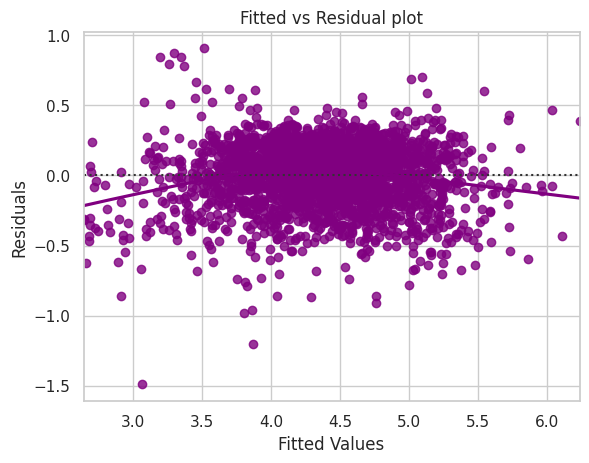

In [87]:
# let us plot the fitted values vs residuals - if there is no pattern - this indicates Linearity
sns.set_style("whitegrid")
sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

There does not seem to be any discernable pattern - Hence we conlude that the predictors are Linearly related to the dependant variable.

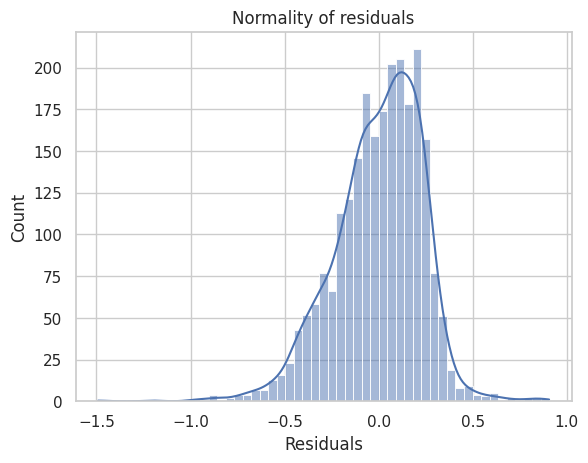

In [88]:
#Test for Normality
#Check the distribution of the residuals :
sns.histplot(df_pred["Residuals"], kde=True)
plt.title("Normality of residuals")
plt.show()

Its a bit left skewed but still fairly normal . We can check some more with the QQ test

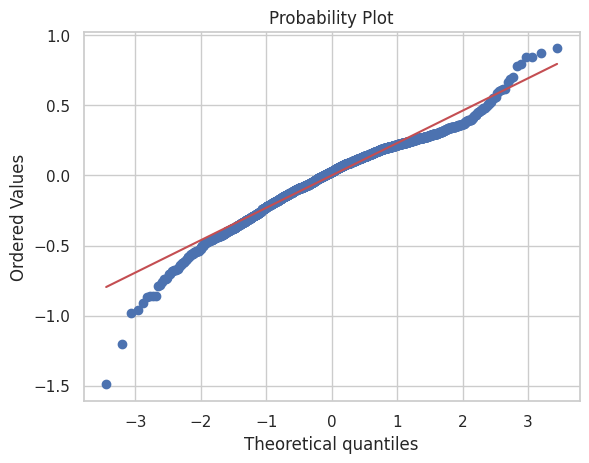

In [89]:
#QQ plot
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

Majority of th epoints either lie on the straight line or close to it - Hence we conclude that the normality condition is met. We will skip the shapiro test : since 2 tests indicate the Normality

**Check for Homoscedacity**
Can use the goldfeldquandt test. If we get p-value > 0.05 we can say that the residuals are homoscedastic, otherwise they are heteroscedastic.
Null hypothesis : Residuals are homoscedastic
Alternate hypothesis : Residuals have hetroscedasticity


In [90]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

In [91]:
name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], X_train_final)
lzip(name, test)

[('F statistic', np.float64(1.0553043400320004)),
 ('p-value', np.float64(0.17589103633022052))]

Since p_value > 0.05 . This implies the residuals are homoscedastic. All the conditions are met and we can now revisit the summary of the final model

## Final Model

In [92]:
olsres_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     1254.
Date:                   Mon, 23 Jun 2025   Prob (F-statistic):               0.00
Time:                           00:06:46   Log-Likelihood:                 78.957
No. Observations:                   2417   AIC:                            -135.9
Df Residuals:                       2406   BIC:                            -72.22
Df Model:                             10                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.2799      0.052     24.388      0.000       1.177       1.383
screen_size              0.0432      0.002     28.268      0.000       0.040       0.046
main_camera_mp           0.0192      0.001     14.228      0.000       0.017       0.022
selfie_camera_mp         0.0129      0.001     12.236      0.000       0.011       0.015
ram                      0.0168      0.004      3.815      0.000       0.008       0.025
normalized_new_price     0.4273      0.011     39.500      0.000       0.406       0.449
age_in_years            -0.0127      0.003     -3.694      0.000      -0.020      -0.006
brand_name_Lenovo        0.0495      0.022      2.286      0.022       0.007       0.092
brand_name_Nokia         0.0725      0.030      2.428      0.015       0.014       0.131
brand_name_Xiaomi        0.0859      0.026      3.348      0.001       0.036       0.136
4g_yes                   0.0412      0.015      2.767      0.006       0.012       0.070
==============================================================================
Omnibus:                      220.128   Durbin-Watson:                   1.916
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              411.846
Skew:                          -0.615   Prob(JB):                     3.70e-90
Kurtosis:                       4.606   Cond. No.                         243.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [93]:
#MOdel performance on training set
# checking model performance on train set (seen 70% data)
print("Model Training Performance\n")
olsmodel_final_train_perf = compute_model_perf(olsres_final, X_train_final, y_train) ## Complete the code to check the performance on train data
olsmodel_final_train_perf

Model Training Performance

4.40052511051139


,R2,adj_R2,MAPE,MAE,RMSE
0,0.839015,0.838279,4.400525,0.183469,0.234194


In [94]:
#MOdel performance on test set
# checking model performance on test set (seen 30% data)
print("Model Training Performance\n")
olsmodel_final_test_perf = compute_model_perf(olsres_final, X_test_final, y_test) ## Complete the code to check the performance on train data
olsmodel_final_test_perf

Model Training Performance

4.511688790284481


,R2,adj_R2,MAPE,MAE,RMSE
0,0.841739,0.840041,4.511689,0.185322,0.238917


The r-square is better for the test sets and the error values are just slightly higher than the training set ! This model works well

## Actionable Insights and Recommendations

-We have discovered that the normalized_used_price cost of the devices depend on the an intercept of 1.28 and following  10 factors mostly with normalized_new_price carrying the maximum weight. As expected the price goes down with the age of the device. Rest of the other factors capture some of the functionalities and brand names.
1. screen_size
2. main_camera_mp
3. selfie_camera_mp
4. ram
5. normalized_new_price
6. age_in_years
7. brand_name_Lenovo
8. brand_name_Nokia
9. brand_name_Xiaomi
10. 4g_yes

normalized_used_price can be computed usng the following equation

normalized_used_price = 1.2799 + 	0.0432*screen_size + 0.0192*main_camera_mp + 0.0129*selfie_camera_mp + 0.0168*ram + 0.4273*normalized_new_price + -0.0127*age_in_years +
0.0495*brand_name_Lenovo + 0.0725*brand_name_Nokia + 0.0859*brand_name_Xiaomi + 0.0412*4g_yes

Overall we were able to simplify the model a lot and yet yield meaningful results


___